In [ ]:
!jt -l

In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

from jupyterthemes import jtplot

jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)

In [ ]:
neff = 2.270316
comprimento = np.linspace(1500e-9,1600e-9,100)
r = 0.9
a = 0.95
k = np.sqrt(1- r**2)
L = 20e-6
beta = neff*2*np.pi/comprimento
phi = beta*L

T = (a**2 - 2*r*a*np.cos(phi) + r**2)/(1 - 2*a*r*np.cos(phi)+(r*a)**2)
plt.plot(comprimento,T)

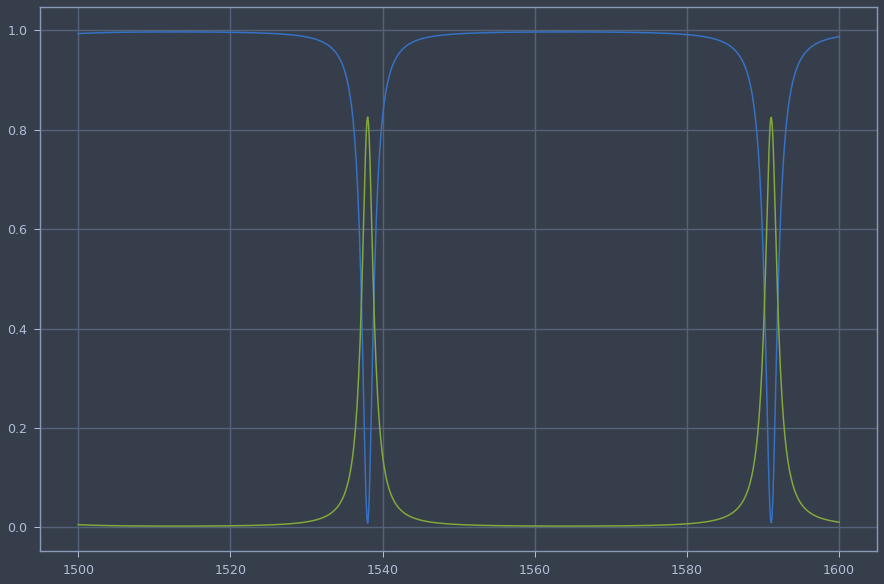

In [47]:
neff = 2.270316
comprimento = np.linspace(1500e-9,1600e-9,1000)
r1 = 0.951164
r2 = 0.951164
a = 0.99
k = np.sqrt(1- r**2)
L = 2.032356e-5
beta = neff*2*np.pi/comprimento
phi = beta*L


Tpteo = (r2**2*a**2 - 2*r1*r2*a*np.cos(beta*L)+r1**2)/(1-2*r1*r2*a*np.cos(beta*L)+(r1*r2*a)**2)
Tdteo = (1-r1*r1)*(1-r2*r2)*a/(1-2*r1*r2*a*np.cos(beta*L)+(r1*r2*a)**2)
plt.plot(comprimento*1e9,Tpteo)
plt.plot(comprimento*1e9,Tdteo)


In [8]:
Lambda = 1550e-9
neff = 2.270316
ng = 4.609680
dn = 2.306162 - 2.257090
fsr = Lambda**2*3200e9/ 299792458 + 2e-9
FWHW = Lambda**2*100e9/299792458 * 1.1

L= Lambda**2/(fsr*ng)
beta = neff*2*np.pi/Lambda
finesse = fsr/FWHW 

Q = Lambda/FWHW

r = np.sqrt((ng*L*np.pi/(2*Q*Lambda))**2 + 1)- ng*L*np.pi/(2*Q*Lambda)
k = np.sqrt(1-r**2)
print(FWHW)

print(r)

comprimentoacoplamento = (Lambda/(np.pi*dn))*np.arcsin(k)


raio = (L-2*comprimentoacoplamento)/(2*np.pi)

8.815265125849164e-10
0.9511640539055121


In [6]:
print(raio)
print(comprimentoacoplamento)
print(L)

1.996274788150345e-06
3.1551233307056862e-06
1.885321107941066e-05


In [2]:
mode = lumapi.MODE(filename= 'Ressonance 1.lms')

(1500.0, 1600.0)

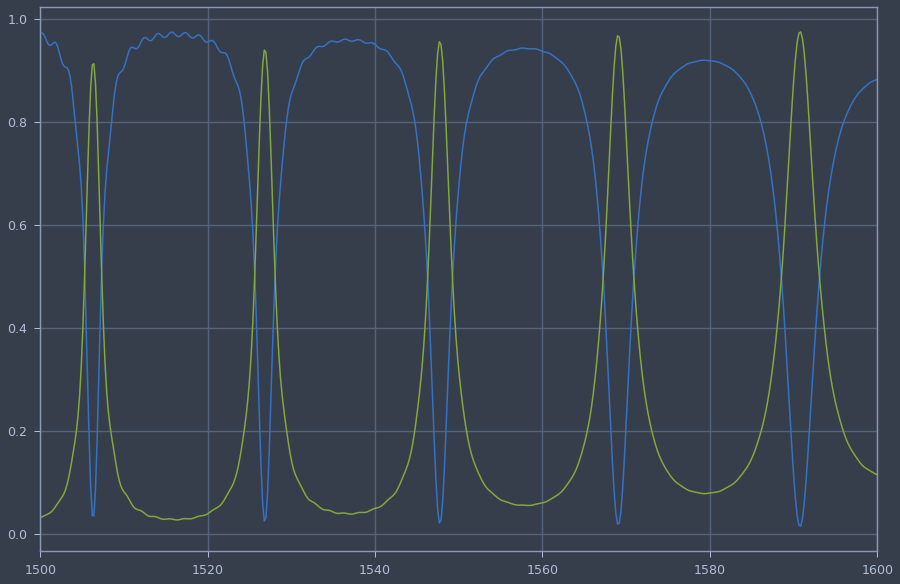

In [5]:
plt.rcParams["figure.figsize"] = (15,10)
Tpass = mode.getresult('pass','T')
x = Tpass['lambda']*1e9
Tpass = Tpass['T']

Tdrop = mode.getresult('drop','T')
Tdrop = Tdrop['T']

plt.plot(x,Tpass)
plt.plot(x,np.abs(Tdrop))
plt.xlim(1500,1600)